In [13]:
import matplotlib.pyplot as plt

from ga import ga, mutation_always, mutation_if

# Plots


Mutatate if the new solution has a btter fit

In [14]:
l = 100
mu = 1 / l
solution, fits = ga(mutation_if, l, mu, 1500)


Final result:
Bit string = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness = 100
Generation = 840


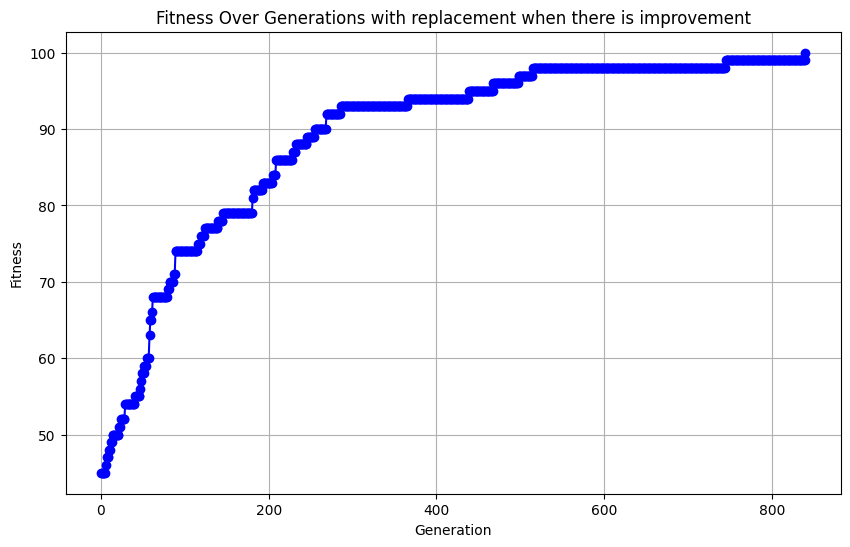

In [15]:
# Plotting the fitness over generations
plt.figure(figsize=(10, 6))
plt.plot(range(len(fits)), fits, marker="o", linestyle="-", color="b")
plt.title("Fitness Over Generations with replacement when there is improvement")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()

In [16]:
l = 100
mu = 1 / l
solution, fits = ga(mutation_always, l, mu, 1500)

Max generations reached without finding the solution!

Final result:
Bit string = [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
Fitness = 50
Generation = 1501


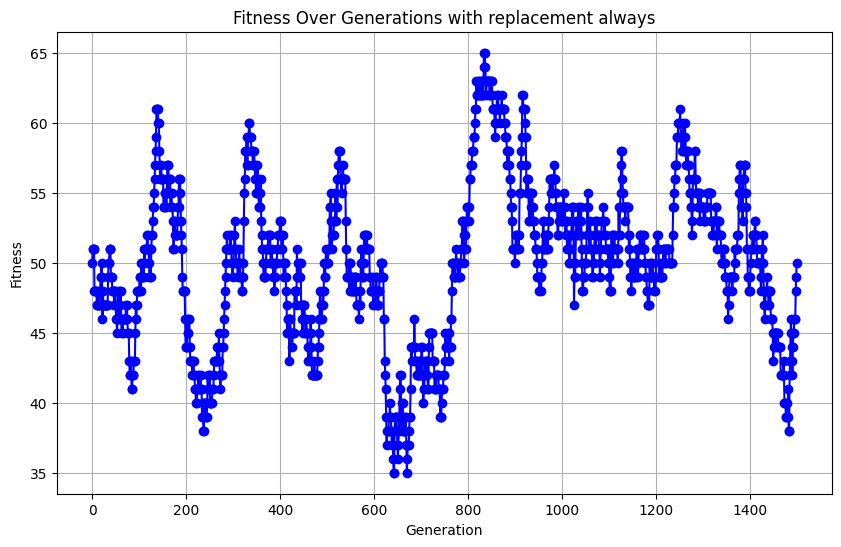

In [17]:
# Plotting the fitness over generations
plt.figure(figsize=(10, 6))
plt.plot(range(len(fits)), fits, marker="o", linestyle="-", color="b")
plt.title("Fitness Over Generations with replacement always")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()